<a href="https://colab.research.google.com/github/ParisaMollahoseini/pose_estimation/blob/main/pose_example_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install pyyaml==5.1
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html


In [1]:
import torch
torch.cuda.is_available()

True

In [3]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
# obtain detectron2's default config
cfg = get_cfg()
# load the pre trained model from Detectron2 model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
# set confidence threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
# load model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
# create the predictor for pose estimation using the config
pose_detector = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:21, 11.2MB/s]                           


Saving 1.jpg to 1.jpg


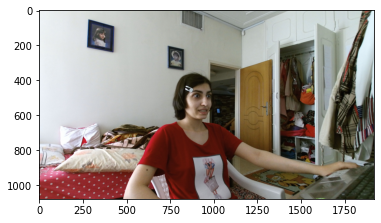

In [4]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['1.jpg']))

import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [28]:
import numpy

open_cv_image = numpy.array(im) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 


In [29]:
outputs = pose_detector(open_cv_image) 

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


In [7]:
keypoints = outputs['instances'][0].get_fields()['pred_keypoints']

In [8]:
type(keypoints)

torch.Tensor

In [24]:
import numpy as np
keypoints_list = keypoints.tolist()
keypoints_list = np.squeeze(keypoints_list)

In [26]:
features = []
# add pose estimate results to the feature array
for row in (keypoints_list):
    # print(row)
    features.append(row[0])
    features.append(row[1])
features

[954.1769409179688,
 529.8642578125,
 967.1344604492188,
 490.9842834472656,
 906.6659545898438,
 492.4242858886719,
 985.8508911132812,
 505.3843078613281,
 827.4810791015625,
 515.4642944335938,
 1027.6029052734375,
 696.9039916992188,
 736.7782592773438,
 709.864013671875,
 1259.3988037109375,
 830.8237915039062,
 548.1741943359375,
 1020.9035034179688,
 1606.3726806640625,
 910.023681640625,
 739.6577758789062,
 1072.743408203125,
 1079.4329833984375,
 1072.743408203125,
 843.3179931640625,
 1072.743408203125,
 1450.88232421875,
 1072.743408203125,
 539.5358276367188,
 1072.743408203125,
 1725.8699951171875,
 884.103759765625,
 1627.968505859375,
 910.023681640625]

In [27]:
len(features)

34